In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
# Mengatur model
model = LogisticRegression(max_iter=200)

In [2]:
# Mengatur K-Fold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross-validation dan menghitung skor
scores = cross_val_score(model, X, y, cv=kfold)
print(f'K-Fold Cross-validation Scores: {scores}')
print(f'Mean Score: {scores.mean()}')


K-Fold Cross-validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Score: 0.9733333333333334


In [3]:
from sklearn.model_selection import StratifiedKFold
# Mengatur Stratified K-Fold Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross-validation dan menghitung skor
stratified_scores = cross_val_score(model, X, y, cv=stratified_kfold)
print(f'Stratified K-Fold Cross-validation Scores: {stratified_scores}')
print(f'Mean Score: {stratified_scores.mean()}')

Stratified K-Fold Cross-validation Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean Score: 0.9666666666666668


In [4]:
from sklearn.model_selection import LeaveOneOut
# Mengatur LOOCV
loocv = LeaveOneOut()
# Melakukan cross-validation dan menghitung skor
loocv_scores = cross_val_score(model, X, y, cv=loocv)
print(f'Leave-One-Out Cross-validation Mean Score: {loocv_scores.mean()}')

Leave-One-Out Cross-validation Mean Score: 0.9666666666666667


In [5]:
from sklearn.model_selection import RepeatedKFold
# Mengatur Repeated K-Fold Cross-validation
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
# Melakukan cross-validation dan menghitung skor
repeated_scores = cross_val_score(model, X, y, cv=repeated_kfold)
print(f'Repeated K-Fold Cross-validation Mean Score: {repeated_scores.mean()}')

Repeated K-Fold Cross-validation Mean Score: 0.9640000000000001


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
# Define the model
model = SVC()
# Define the parameter grid
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [1, 0.1, 0.01, 0.001],
'kernel': ['rbf']
}
# Initialize Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# Fit Grid Search
grid_search.fit(X, y)
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9800000000000001


In [8]:
# Install library jika belum ada (opsional, hanya jalankan di environment baru)
!pip install pandas seaborn scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Tambahkan kolom spesies berdasarkan target
data['species'] = iris.target

# Map target integers ke nama spesies yang benar
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Tampilkan 5 baris pertama
print(data.head())

# Statistik deskriptif dari dataset
print(data.describe())

# Cek nilai yang hilang (missing values)
print(data.isnull().sum())



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

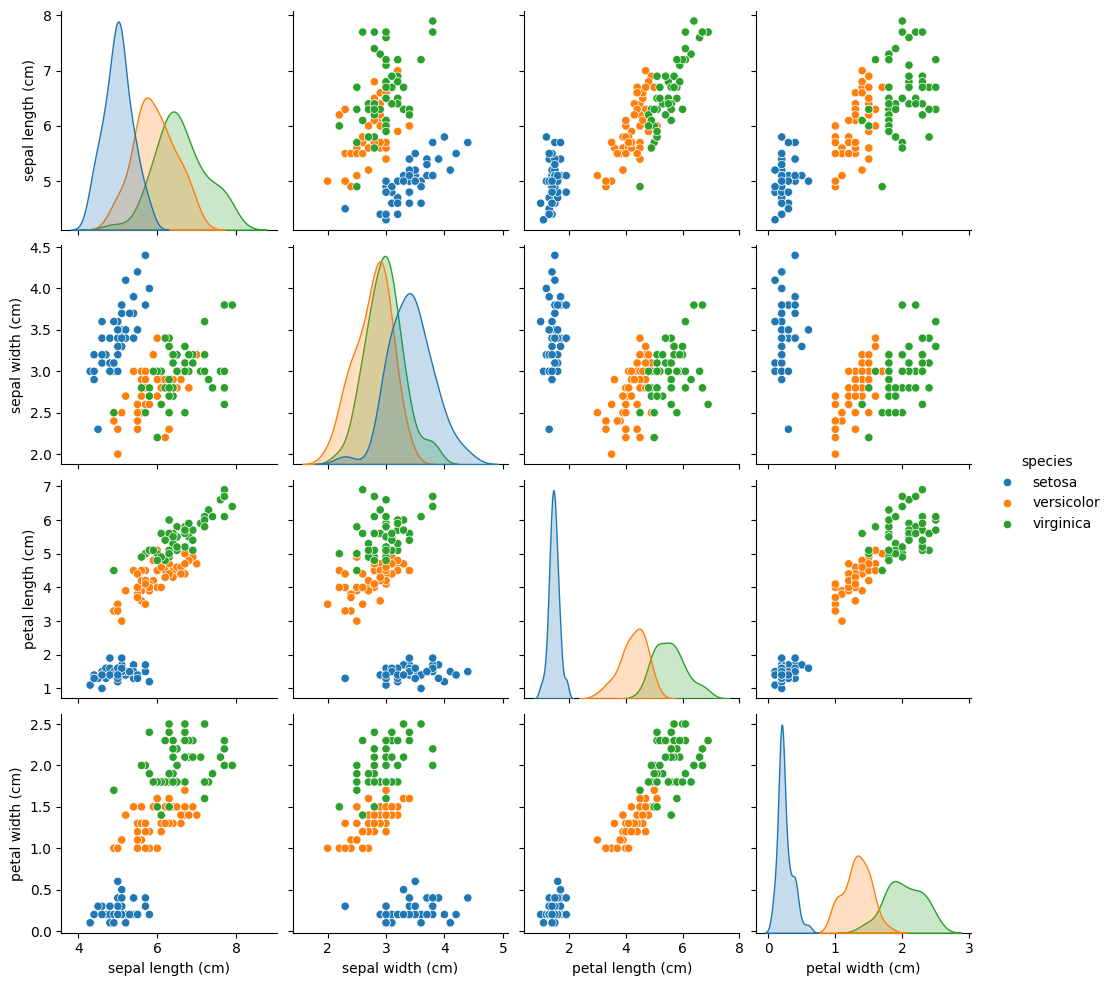

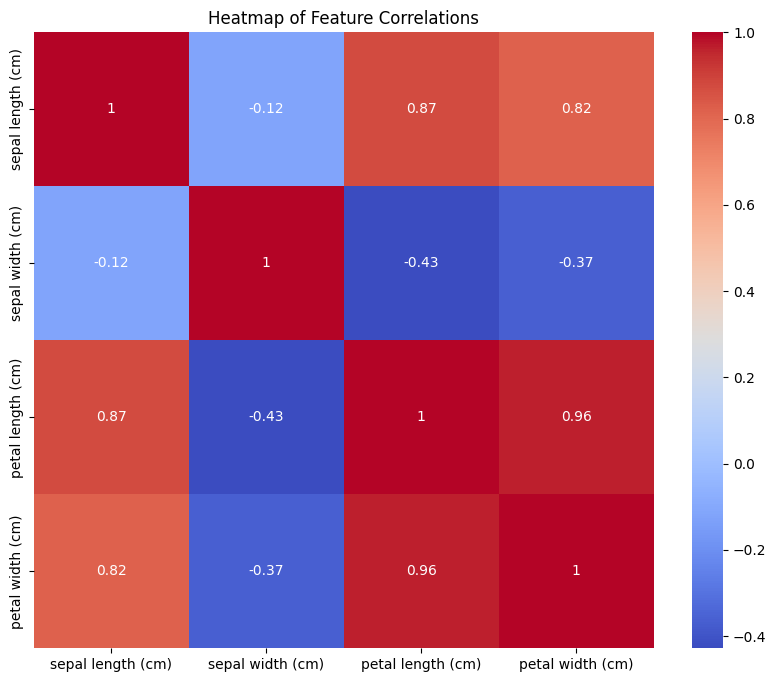

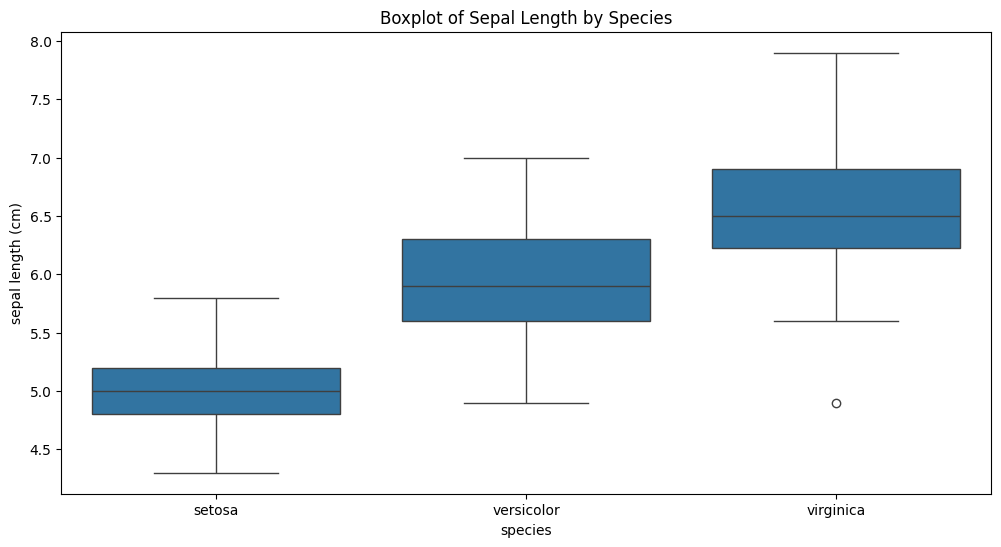

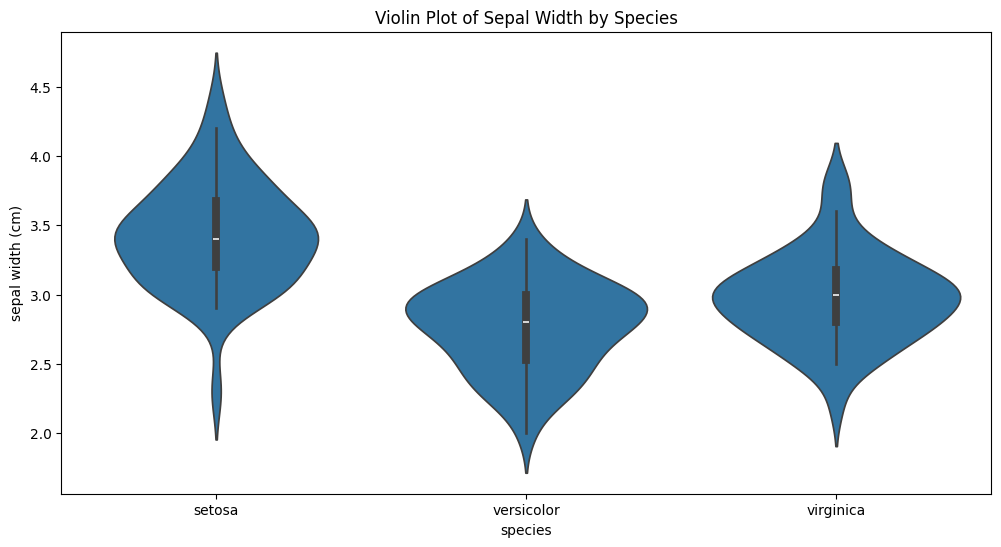

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(data, hue='species')
plt.show()

# Heatmap of correlation (eksklusi kolom kategorikal 'species')
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='sepal width (cm)', data=data)
plt.title("Violin Plot of Sepal Width by Species")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Konversi iris.target ke pd.Series sebelum menggunakan .map()
data['species'] = pd.Series(iris.target).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Pairplot
sns.pairplot(data, hue='species')
plt.show()

# Heatmap of correlation (menghapus kolom 'species' karena bukan numerik)
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='sepal width (cm)', data=data)
plt.title("Violin Plot of Sepal Width by Species")
plt.show()

# Split data into training and testing sets
X = data.drop(columns=['species'])
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


AttributeError: 'numpy.ndarray' object has no attribute 'map'